# Flight Fare Prediction - Exploratory Data Analysis (EDA)

This notebook provides a step-by-step walkthrough of the EDA process, replicating the logic in `src/eda.py` but in an interactive format.

In [12]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Add the project root to the path so we can import from src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src import config
from src.data_loader import load_data
from src.preprocessing import preprocess_data
from src.feature_engineering import engineer_features

# Set plot style
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

## 1. Load and Prepare Data

We use the pipeline functions to load, clean, and engineer features for our data.

In [13]:
# Load Data
df = load_data()
print(f"Initial Shape: {df.shape}")

# Preprocess
df_clean = preprocess_data(df)
print(f"Shape after Cleaning: {df_clean.shape}")

# Feature Engineering (without encoding/scaling for EDA visuals)
# We want human-readable categories for plots, not one-hot encoded columns.
# So we pass encode=False, scale=False
df_eda = engineer_features(df_clean, encode=False, scale=False)
print(f"Shape after Feature Engineering: {df_eda.shape}")
display(df_eda.head())

INFO: Loading data from c:\Users\MubarakTijani\flight-fare-prediction\data\raw\Flight_Price_Dataset_of_Bangladesh copy.csv
INFO: Data loaded successfully. Shape: (57000, 17)
INFO: Starting preprocessing...
c:\Users\MubarakTijani\flight-fare-prediction\src\preprocessing.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Base Fare (BDT)"].fillna(df["Base Fare (BDT)"].median(), inplace=True)
c:\Users\MubarakTijani\flight-fare-prediction\src\preprocessing.py:35: FutureWarning: A value is trying to be set on a copy of a DataF

Initial Shape: (57000, 17)
Shape after Cleaning: (57000, 18)
Shape after Feature Engineering: (57000, 35)


,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,Date,Month,Day,Weekday,Dep_Hour,Time_of_Day,Month_Sin,Month_Cos,Day_Sin,Day_Cos,Weekday_Sin,Weekday_Cos,Hour_Sin,Hour_Cos,Route,Duration_Category,Season,Class_Encoded
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,0,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10,2025-11-17 06:25:00,11,17,0,6,Morning,-5.000000e-01,8.660254e-01,-0.299363,-0.954139,0.000000,1.000000,1.000000e+00,6.123234e-17,CXB_CCU,Short-Haul,Autumn,1
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,0,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14,2025-03-16 00:17:00,3,16,6,0,Night,1.000000e+00,6.123234e-17,-0.101168,-0.994869,-0.781831,0.623490,0.000000e+00,1.000000e+00,BZL_CGP,Short-Haul,Spring,3
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83,2025-12-13 12:03:00,12,13,5,12,Afternoon,-2.449294e-16,1.000000e+00,0.485302,-0.874347,-0.974928,-0.222521,1.224647e-16,-1.000000e+00,ZYL_KUL,Short-Haul,Winter,1
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,0,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56,2025-05-30 03:21:00,5,30,4,3,Night,5.000000e-01,-8.660254e-01,-0.201299,0.979530,-0.433884,-0.900969,7.071068e-01,7.071068e-01,RJH_DAC,Short-Haul,Spring,1
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90,2025-04-25 09:14:00,4,25,4,9,Morning,8.660254e-01,-5.000000e-01,-0.937752,0.347305,-0.433884,-0.900969,7.071068e-01,-7.071068e-01,SPD_YYZ,Long-Haul,Spring,2


In [16]:
df_eda["Total Fare (BDT)"].min()

np.float64(1800.9756881504618)

## 2. Descriptive Statistics

Let's look at the basic statistics of our dataset.

In [3]:
target = 'Total Fare (BDT)'

print("--- Data Description ---")
display(df_eda.describe())

--- Data Description ---


,Duration (hrs),Stopovers,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure,Date,Month,Day,Weekday,Dep_Hour,Month_Sin,Month_Cos,Day_Sin,Day_Cos,Weekday_Sin,Weekday_Cos,Hour_Sin,Hour_Cos,Class_Encoded
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000,57000,57000.000000,57000.000000,57000.000000,57000.000000,5.700000e+04,5.700000e+04,5.700000e+04,57000.000000,57000.000000,57000.000000,5.700000e+04,5.700000e+04,57000.000000
mean,3.994955,0.409053,58899.556573,11448.238494,71030.316199,45.460579,2025-08-16 19:30:16.347368704,6.543895,15.681491,3.006281,11.465772,-9.507036e-03,-4.947598e-04,5.036162e-03,-0.022015,-0.001767,-0.006777,1.552230e-03,9.065319e-03,1.997667
min,0.500000,0.000000,1600.975688,200.000000,1800.975688,1.000000,2025-01-03 02:06:00,1.000000,1.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-9.987165e-01,-0.994869,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00,1.000000
25%,1.003745,0.000000,8856.316983,200.000000,9602.699787,23.000000,2025-05-17 13:05:15,4.000000,8.000000,1.000000,5.000000,-8.660254e-01,-5.000000e-01,-7.247928e-01,-0.758758,-0.781831,-0.900969,-7.071068e-01,-7.071068e-01,1.000000
50%,2.644656,0.000000,31615.996792,9450.940481,41307.544990,45.000000,2025-08-17 12:05:00,7.000000,16.000000,3.000000,11.000000,-2.449294e-16,-1.836970e-16,-2.449294e-16,-0.050649,0.000000,-0.222521,1.224647e-16,6.123234e-17,2.000000
75%,5.490104,1.000000,85722.930389,17513.046160,103800.906963,68.000000,2025-11-14 23:39:15,10.000000,23.000000,5.000000,18.000000,5.000000e-01,8.660254e-01,7.247928e-01,0.688967,0.781831,0.623490,7.071068e-01,7.071068e-01,3.000000
max,15.831719,2.000000,449222.933770,73383.440066,558987.332444,90.000000,2026-03-31 03:20:00,12.000000,31.000000,6.000000,23.000000,1.000000e+00,1.000000e+00,9.987165e-01,1.000000,0.974928,1.000000,1.000000e+00,1.000000e+00,3.000000
std,4.094043,0.587813,68840.614499,12124.344329,81769.199536,26.015657,NaN,3.446463,8.783797,1.994553,6.961699,7.070553e-01,7.071066e-01,7.132470e-01,0.700561,0.705968,0.708222,7.057418e-01,7.084218e-01,0.817477


### Fare Summary by Group
How does the price vary by Airline, Source, etc.?

In [4]:
groups = ['Airline', 'Source', 'Destination', 'Season', 'Class']

for group in groups:
    if group in df_eda.columns:
        print(f"\n--- Fare Summary by {group} ---")
        summary = df_eda.groupby(group)[target].describe()
        display(summary)


--- Fare Summary by Airline ---


,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Air Arabia,2217.0,69924.006965,80842.736398,1805.984292,9726.154688,42120.798344,97461.655539,446442.765662
Air Astra,2304.0,68497.407804,78243.987219,1872.587627,9665.533089,40507.210978,100851.209437,459992.376126
Air India,2280.0,72474.178419,83772.264938,1816.371029,9656.929032,42429.622428,103057.767805,404646.529713
AirAsia,2312.0,74534.390651,85962.633751,1804.132096,9438.713817,42763.823207,111325.258519,415248.029434
Biman Bangladesh Airlines,2344.0,70192.969287,81289.830154,1854.057950,9373.750115,40733.364320,101751.779949,489089.920796
British Airways,2209.0,70555.536205,80049.757346,1846.020570,9737.393174,41236.301006,107983.831431,522606.373836
Cathay Pacific,2282.0,73325.091124,83285.505080,1805.890639,9663.966881,46282.463647,106516.089052,419822.087383
Emirates,2327.0,70106.149413,80542.712007,1840.500489,10037.707716,41478.505370,104150.433772,473812.803729
Etihad Airways,2267.0,71785.242045,80227.149662,1828.221490,10279.371090,43723.220688,109431.764310,472869.985766



--- Fare Summary by Source ---


,count,mean,std,min,25%,50%,75%,max
Source,,,,,,,,
BZL,7102.0,72679.107126,83073.378439,1824.634260,9917.901648,43584.805691,105611.897647,489089.920796
CGP,7241.0,70877.632428,82236.605348,1809.274256,9566.196905,40416.259523,103504.126239,524278.760370
CXB,7049.0,71012.870669,81382.150548,1804.132096,9422.314109,41133.573253,104190.512435,479213.617169
DAC,7146.0,70349.705188,81107.223691,1805.890639,9505.376258,40935.910531,103579.932599,466709.754241
JSR,7149.0,69545.898548,80296.039344,1808.644603,9519.301965,40819.996718,101228.745057,473812.803729
RJH,7091.0,70532.908301,82069.226896,1800.975688,9368.291307,39743.686337,103572.142471,522606.373836
SPD,7043.0,71306.310958,81523.098470,1812.391403,9742.817437,41149.839323,105337.628541,546970.922902
ZYL,7179.0,71946.583077,82426.616921,1801.196913,9916.207295,42643.366811,104098.284135,558987.332444



--- Fare Summary by Destination ---


,count,mean,std,min,25%,50%,75%,max
Destination,,,,,,,,
BKK,3036.0,107971.298644,80852.070516,10767.177157,48021.978508,79582.964715,147050.023716,405746.388116
BZL,2641.0,7654.837753,3855.614528,1805.890639,4160.250069,7277.119405,10751.775142,21039.435684
CCU,2938.0,104605.991612,82609.786818,6612.819060,43141.001620,75946.127071,143090.593302,447814.559022
CGP,2613.0,7610.478020,3853.127735,1812.391403,4209.359848,7208.291216,10633.314630,26971.201391
CXB,2652.0,7496.466066,3854.010032,1805.984292,4063.032626,7007.594410,10484.668546,24497.501081
DAC,2591.0,7645.268351,3895.680325,1801.196913,4163.682214,7157.937047,10642.217545,24908.878803
DEL,3069.0,104542.629072,82056.434163,6712.879907,43871.291302,75419.011232,140830.024791,524278.760370
DOH,2923.0,107011.914283,81769.365176,8717.065594,46365.523426,79583.131743,145003.053119,473812.803729
DXB,3005.0,109374.478217,84689.605750,8813.638627,46922.201116,79052.725804,148955.049937,489089.920796



--- Fare Summary by Season ---


,count,mean,std,min,25%,50%,75%,max
Season,,,,,,,,
Autumn,14440.0,67855.062793,77770.969514,1800.975688,9197.303401,39487.268618,99511.964403,413660.962192
Spring,14416.0,68604.202442,78371.885847,1817.870855,9474.662808,40434.859555,101289.132423,524278.760370
Summer,14285.0,69178.035498,80395.187009,1801.196913,9334.914507,40255.912595,100128.748994,558987.332444
Winter,13859.0,78771.520102,89820.693870,2017.800607,10651.839522,46528.810416,116001.050818,493383.967310



--- Fare Summary by Class ---


,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Business,18909.0,62581.014435,55161.199863,4200.002136,8022.966608,51061.844599,108403.412271,283753.104256
Economy,19112.0,30002.073026,26635.701394,1800.975688,3944.739658,24071.439030,52083.051182,149066.656865
First Class,18979.0,120764.213167,109980.064862,8201.193549,12916.488747,94191.037108,211591.705071,558987.332444


## 3. Visual Analysis

Visualizing the distributions and relationships.

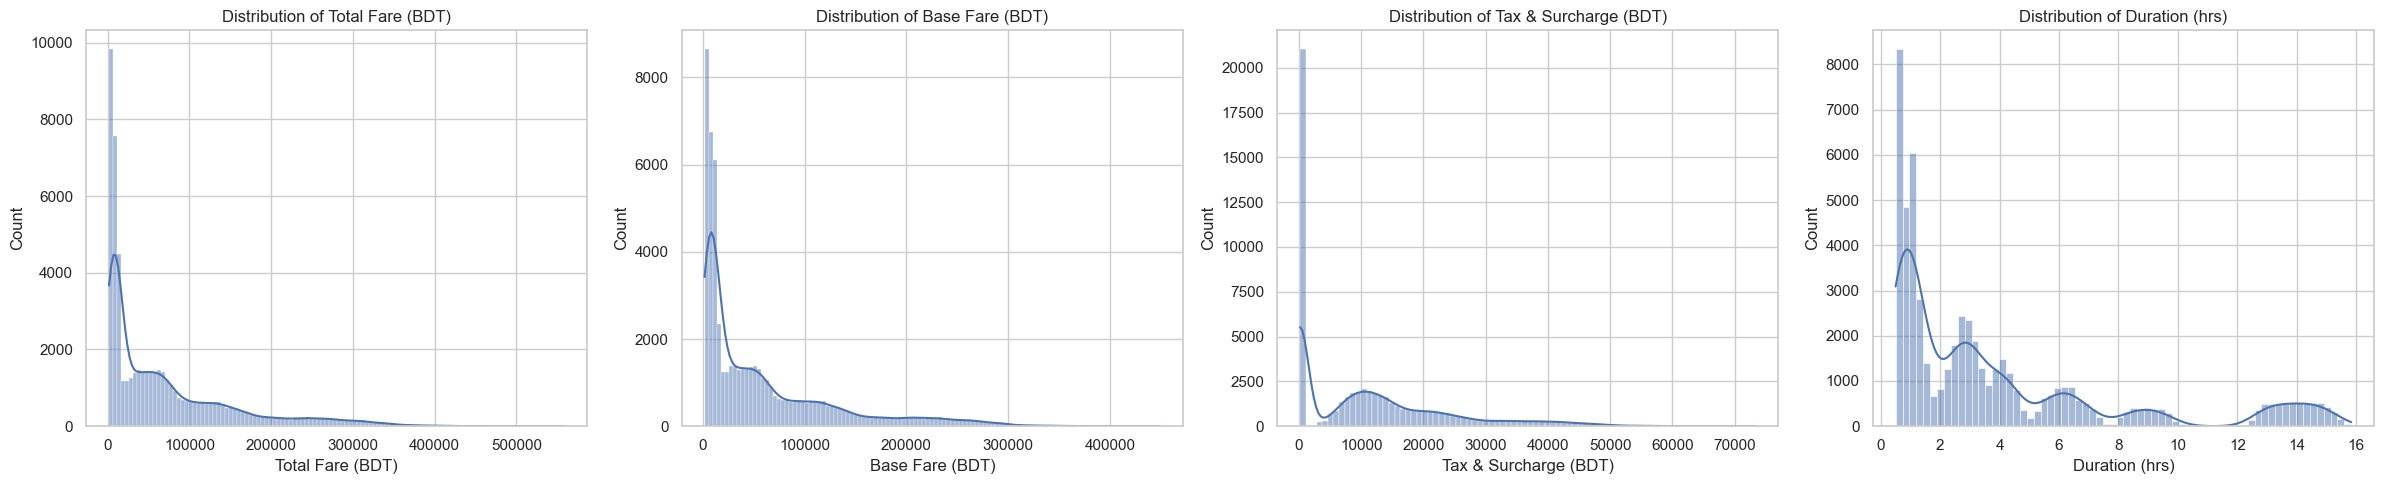

In [5]:
# Distributions of Numerical Data
cols_to_plot = [target, 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Duration (hrs)']
cols_present = [c for c in cols_to_plot if c in df_eda.columns]

if cols_present:
    fig, axes = plt.subplots(1, len(cols_present), figsize=(6 * len(cols_present), 5))
    if len(cols_present) == 1:
        axes = [axes]
        
    for i, col in enumerate(cols_present):
        sns.histplot(df_eda[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

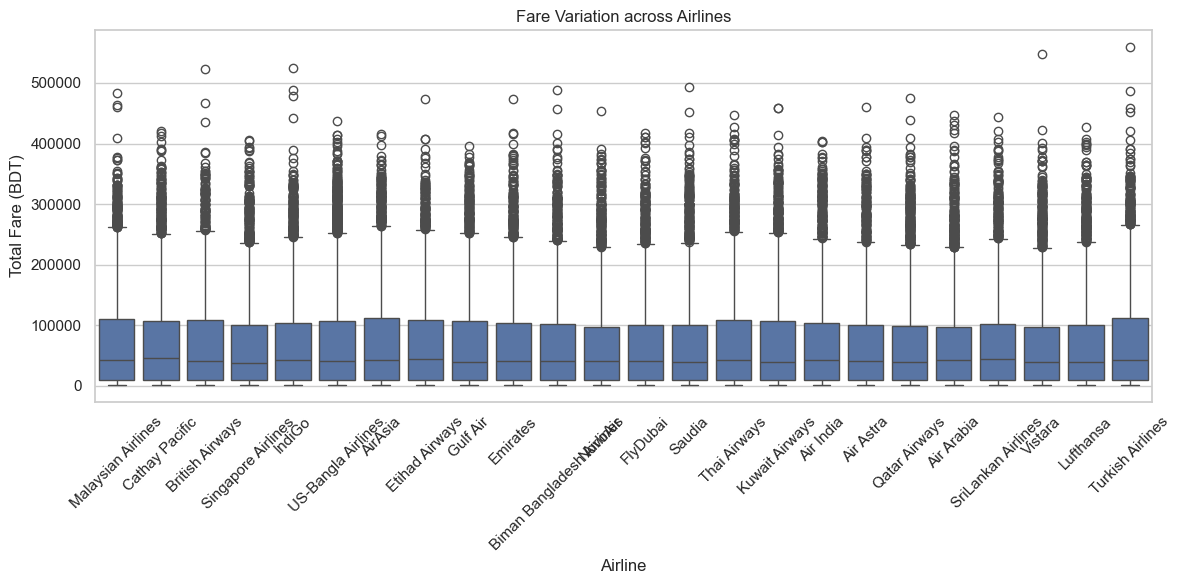

In [6]:
# Boxplot: Fare Variation across Airlines
if 'Airline' in df_eda.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Airline', y=target, data=df_eda)
    plt.xticks(rotation=45)
    plt.title('Fare Variation across Airlines')
    plt.tight_layout()
    plt.show()

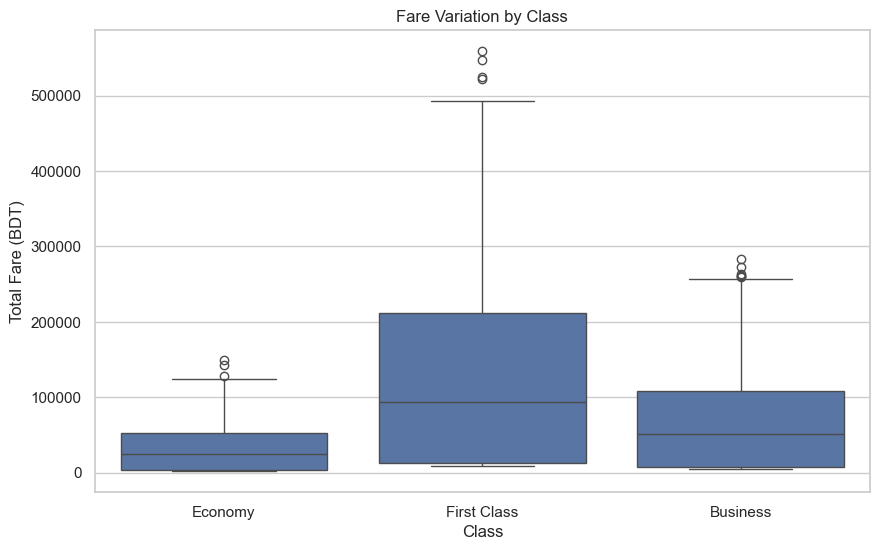

In [7]:
# Boxplot: Fare by Class
if 'Class' in df_eda.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=target, data=df_eda)
    plt.title('Fare Variation by Class')
    plt.show()

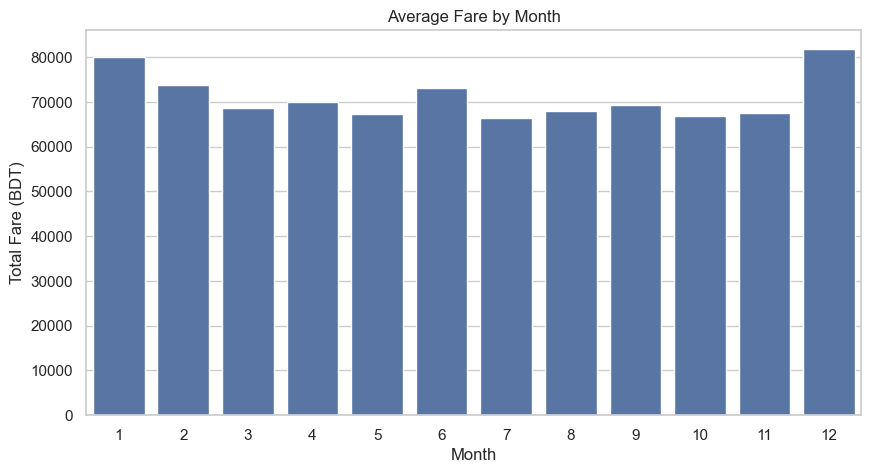

In [8]:
# Average Fare by Month
if 'Month' in df_eda.columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Month', y=target, data=df_eda, estimator='mean', errorbar=None)
    plt.title('Average Fare by Month')
    plt.show()

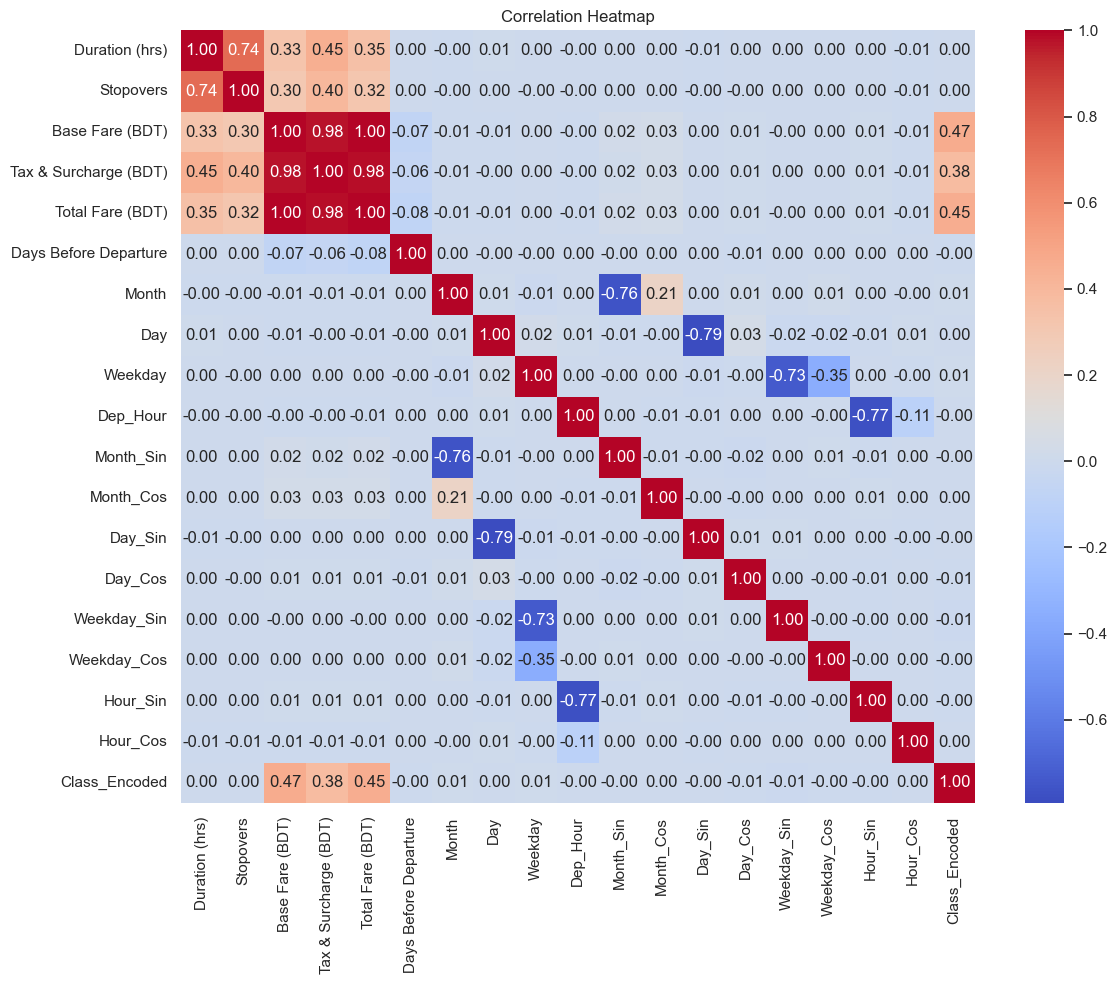

In [9]:
# Correlation Heatmap
numeric_df = df_eda.select_dtypes(include=['number'])
if not numeric_df.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

## 4. KPI Exploration

Calculating derived business insights.

In [10]:
# 1. Most popular routes
if 'Source' in df_eda.columns and 'Destination' in df_eda.columns:
    popular_routes = df_eda.groupby(['Source', 'Destination']).size().sort_values(ascending=False)
    print("\n--- Most Popular Routes ---")
    display(popular_routes.head(5))

# 2. Most expensive routes
if 'Source' in df_eda.columns and 'Destination' in df_eda.columns:
    expensive_routes = df_eda.groupby(['Source', 'Destination'])[target].mean().sort_values(ascending=False)
    print("\n--- Top 5 Most Expensive Routes ---")
    display(expensive_routes.head(5))


--- Most Popular Routes ---


Source  Destination
RJH     SIN            417
DAC     DXB            413
BZL     YYZ            410
CGP     BKK            408
CXB     DEL            408
dtype: int64


--- Top 5 Most Expensive Routes ---


Source  Destination
SPD     BKK            117951.572347
CXB     YYZ            117848.709744
        LHR            116667.654377
        JFK            116476.311601
BZL     JFK            115968.436285
Name: Total Fare (BDT), dtype: float64